# Example of consuming a machine learning model service with REST API

In [67]:
import requests
import json
import cv2
import matplotlib.pyplot as plt

Service provider configuration:

In [68]:
HOSTNAME="172.18.0.2"
MODEL="febrero-cpu-friendly_weights"
ENDPOINT='http://%s:8501/v1/models/%s' % (HOSTNAME, MODEL)

## API usage

### Query service status

In [69]:
r = requests.get(ENDPOINT)
r.json()

{'model_version_status': [{'state': 'AVAILABLE',
   'status': {'error_code': 'OK', 'error_message': ''},
   'version': '1'}]}

### Query model metadata

In [70]:
r = requests.get(ENDPOINT+"/metadata")
r.json()

{'metadata': {'signature_def': {'signature_def': {'serving_default': {'inputs': {'input_image': {'dtype': 'DT_FLOAT',
       'name': 'conv2d_11_input:0',
       'tensor_shape': {'dim': [{'name': '', 'size': '-1'},
         {'name': '', 'size': '64'},
         {'name': '', 'size': '64'},
         {'name': '', 'size': '3'}],
        'unknown_rank': False}}},
     'method_name': 'tensorflow/serving/predict',
     'outputs': {'dense_12/Softmax:0': {'dtype': 'DT_FLOAT',
       'name': 'dense_12/Softmax:0',
       'tensor_shape': {'dim': [{'name': '', 'size': '-1'},
         {'name': '', 'size': '2'}],
        'unknown_rank': False}}}}}}},
 'model_spec': {'name': 'febrero-cpu-friendly_weights',
  'signature_name': '',
  'version': '1'}}

In [71]:
INPUT_IMAGE_WIDTH = r.json()['metadata']['signature_def']['signature_def']['serving_default']['inputs']['input_image']['tensor_shape']['dim'][1]['size']
INPUT_IMAGE_HEIGHT = r.json()['metadata']['signature_def']['signature_def']['serving_default']['inputs']['input_image']['tensor_shape']['dim'][2]['size']
INPUT_IMAGE_WIDTH, INPUT_IMAGE_HEIGHT

('64', '64')

### Make a prediction

In [72]:
def predict_crack_or_no_crack(img):
    r = requests.post(ENDPOINT+':predict', json={"instances": [{'input_image': img.tolist()}]})
    result = {
        "no_crack_prob": r.json()['predictions'][0][0],
        "crack_prob": r.json()['predictions'][0][1]
    }
    return result

def load_local_image(img_filename, w,h):
    img = cv2.imread("%s%s" % (IMG_PATH,TEST_IMAGE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # fix color order (depends on OpenCV version)
    return cv2.resize(img,(int(w),int(h))) 

{'crack_prob': 1.0, 'no_crack_prob': 0.0}

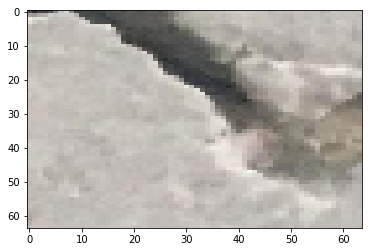

In [76]:
IMG_PATH="/tf/notebooks/data/datasets/cracks-redux/demo/"
TEST_IMAGE="1.jpg"

img = load_local_image(IMG_PATH+TEST_IMAGE,INPUT_IMAGE_WIDTH,INPUT_IMAGE_HEIGHT)
plt.imshow(img, interpolation='nearest', aspect='auto')
predict_crack_or_no_crack(img)